## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [26]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [27]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9, 0.8, 0.6]

In [28]:
results = {}
for lr in LEARNING_RATE:
    for m in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        #model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=m)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-lr-%s, %s" % (str(lr), str(m))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with LR = 0.100000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.1166 - accuracy: 0.2083 - val_loss: 2.0373 - val_accuracy: 0.2077
Epoch 2/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.9627 - accuracy: 0.2660 - val_loss: 1.9201 - val_accuracy: 0.2965
Epoch 3/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.7950 - accuracy: 0.3469 - val_loss: 1.8925 - val_accuracy: 0.3200
Epoch 4/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.7241 - accuracy: 0.3787 - val_loss: 1.8786 - val_accuracy: 0.3108
Epoch 5/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.6728 - accuracy: 0.3947 - val_loss: 1.6686 - val_accuracy: 0.3966
Epoch 6/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.6315 - accuracy: 0.4114 - val_loss: 1.7788 - val_accuracy: 0.3800
Epoch 7/50
50000/50000 [========

Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7217 - accuracy: 0.3779 - val_loss: 1.8908 - val_accuracy: 0.3394
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6792 - accuracy: 0.3933 - val_loss: 1.6716 - val_accuracy: 0.3987
Epoch 7/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.6456 - accuracy: 0.4070 - val_loss: 1.6603 - val_accuracy: 0.4086
Epoch 8/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5986 - accuracy: 0.4260 - val_loss: 1.6454 - val_accuracy: 0.4094
Epoch 9/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5836 - accuracy: 0.4316 - val_loss: 1.6883 - val_accuracy: 0.4005
Epoch 10/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.5400 - accuracy: 0.4470 - val_loss: 2.1486 - val_accuracy: 0.3112
Epoch 11/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.5440 - accuracy: 0.4457 - va

50000/50000 [==============================] - 7s 130us/step - loss: 1.4580 - accuracy: 0.4777 - val_loss: 1.5936 - val_accuracy: 0.4181
Epoch 10/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4271 - accuracy: 0.4891 - val_loss: 1.6832 - val_accuracy: 0.4159
Epoch 11/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.3975 - accuracy: 0.5006 - val_loss: 1.4971 - val_accuracy: 0.4667
Epoch 12/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.3686 - accuracy: 0.5105 - val_loss: 1.5944 - val_accuracy: 0.4452
Epoch 13/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.3554 - accuracy: 0.5147 - val_loss: 1.5428 - val_accuracy: 0.4603
Epoch 14/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.3224 - accuracy: 0.5301 - val_loss: 1.4483 - val_accuracy: 0.4856
Epoch 15/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.2984 - accuracy: 0.5357 - val_loss:

50000/50000 [==============================] - 7s 133us/step - loss: 1.1874 - accuracy: 0.5826 - val_loss: 1.3746 - val_accuracy: 0.5059
Epoch 14/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.1659 - accuracy: 0.5884 - val_loss: 1.4826 - val_accuracy: 0.4825
Epoch 15/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.1398 - accuracy: 0.5983 - val_loss: 1.4010 - val_accuracy: 0.5159
Epoch 16/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.1165 - accuracy: 0.6061 - val_loss: 1.3936 - val_accuracy: 0.5125
Epoch 17/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.0921 - accuracy: 0.6152 - val_loss: 1.3869 - val_accuracy: 0.5211
Epoch 18/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.0690 - accuracy: 0.6219 - val_loss: 1.4625 - val_accuracy: 0.5017
Epoch 19/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.0518 - accuracy: 0.6284 - val_loss:

50000/50000 [==============================] - 7s 134us/step - loss: 1.2068 - accuracy: 0.5744 - val_loss: 1.4248 - val_accuracy: 0.5035
Epoch 18/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.1968 - accuracy: 0.5756 - val_loss: 1.3593 - val_accuracy: 0.5162
Epoch 19/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.1757 - accuracy: 0.5862 - val_loss: 1.5082 - val_accuracy: 0.4835
Epoch 20/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.1556 - accuracy: 0.5933 - val_loss: 1.3637 - val_accuracy: 0.5185
Epoch 21/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.1295 - accuracy: 0.6048 - val_loss: 1.4400 - val_accuracy: 0.4938
Epoch 22/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.1194 - accuracy: 0.6068 - val_loss: 1.4055 - val_accuracy: 0.5095
Epoch 23/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.0953 - accuracy: 0.6164 - val_loss:

50000/50000 [==============================] - 6s 129us/step - loss: 1.2774 - accuracy: 0.5507 - val_loss: 1.4304 - val_accuracy: 0.4761
Epoch 22/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.2650 - accuracy: 0.5538 - val_loss: 1.4953 - val_accuracy: 0.4710
Epoch 23/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.2496 - accuracy: 0.5615 - val_loss: 1.4543 - val_accuracy: 0.4804
Epoch 24/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.2376 - accuracy: 0.5635 - val_loss: 1.4087 - val_accuracy: 0.4986
Epoch 25/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2278 - accuracy: 0.5680 - val_loss: 1.3835 - val_accuracy: 0.5112
Epoch 26/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.2172 - accuracy: 0.5723 - val_loss: 1.4415 - val_accuracy: 0.4815
Epoch 27/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2030 - accuracy: 0.5784 - val_loss:

50000/50000 [==============================] - 7s 138us/step - loss: 1.3639 - accuracy: 0.5210 - val_loss: 1.4321 - val_accuracy: 0.4918
Epoch 26/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.3521 - accuracy: 0.5251 - val_loss: 1.4811 - val_accuracy: 0.4752
Epoch 27/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.3403 - accuracy: 0.5285 - val_loss: 1.4698 - val_accuracy: 0.4849
Epoch 28/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.3304 - accuracy: 0.5335 - val_loss: 1.4385 - val_accuracy: 0.4874
Epoch 29/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.3198 - accuracy: 0.5370 - val_loss: 1.4205 - val_accuracy: 0.4925
Epoch 30/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.3104 - accuracy: 0.5401 - val_loss: 1.4162 - val_accuracy: 0.4933
Epoch 31/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.2999 - accuracy: 0.5447 - val_loss:

50000/50000 [==============================] - 7s 135us/step - loss: 1.4820 - accuracy: 0.4826 - val_loss: 1.5188 - val_accuracy: 0.4611
Epoch 30/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.4739 - accuracy: 0.4842 - val_loss: 1.5115 - val_accuracy: 0.4676
Epoch 31/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.4659 - accuracy: 0.4864 - val_loss: 1.5181 - val_accuracy: 0.4641
Epoch 32/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.4587 - accuracy: 0.4884 - val_loss: 1.5143 - val_accuracy: 0.4614
Epoch 33/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4512 - accuracy: 0.4915 - val_loss: 1.4990 - val_accuracy: 0.4672
Epoch 34/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4436 - accuracy: 0.4948 - val_loss: 1.4998 - val_accuracy: 0.4673
Epoch 35/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4367 - accuracy: 0.4966 - val_loss:

50000/50000 [==============================] - 7s 138us/step - loss: 1.6031 - accuracy: 0.4410 - val_loss: 1.6159 - val_accuracy: 0.4328
Epoch 34/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5974 - accuracy: 0.4420 - val_loss: 1.6187 - val_accuracy: 0.4328
Epoch 35/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5915 - accuracy: 0.4448 - val_loss: 1.6018 - val_accuracy: 0.4369
Epoch 36/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.5860 - accuracy: 0.4480 - val_loss: 1.5980 - val_accuracy: 0.4396
Epoch 37/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5806 - accuracy: 0.4482 - val_loss: 1.5954 - val_accuracy: 0.4379
Epoch 38/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5756 - accuracy: 0.4507 - val_loss: 1.5937 - val_accuracy: 0.4418
Epoch 39/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5706 - accuracy: 0.4512 - val_loss:

50000/50000 [==============================] - 7s 142us/step - loss: 1.7346 - accuracy: 0.3944 - val_loss: 1.7374 - val_accuracy: 0.3952
Epoch 38/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.7301 - accuracy: 0.3965 - val_loss: 1.7334 - val_accuracy: 0.3958
Epoch 39/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7258 - accuracy: 0.3975 - val_loss: 1.7279 - val_accuracy: 0.3982
Epoch 40/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7214 - accuracy: 0.3989 - val_loss: 1.7245 - val_accuracy: 0.4013
Epoch 41/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7173 - accuracy: 0.4011 - val_loss: 1.7206 - val_accuracy: 0.3982
Epoch 42/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7134 - accuracy: 0.4021 - val_loss: 1.7163 - val_accuracy: 0.4032
Epoch 43/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7095 - accuracy: 0.4041 - val_loss:

50000/50000 [==============================] - 6s 129us/step - loss: 1.8158 - accuracy: 0.3681 - val_loss: 1.8183 - val_accuracy: 0.3650
Epoch 42/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.8123 - accuracy: 0.3700 - val_loss: 1.8150 - val_accuracy: 0.3648
Epoch 43/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.8089 - accuracy: 0.3714 - val_loss: 1.8117 - val_accuracy: 0.3659
Epoch 44/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.8055 - accuracy: 0.3727 - val_loss: 1.8084 - val_accuracy: 0.3660
Epoch 45/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.8020 - accuracy: 0.3727 - val_loss: 1.8059 - val_accuracy: 0.3684
Epoch 46/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7989 - accuracy: 0.3744 - val_loss: 1.8021 - val_accuracy: 0.3705
Epoch 47/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7958 - accuracy: 0.3753 - val_loss:

50000/50000 [==============================] - 6s 129us/step - loss: 1.8946 - accuracy: 0.3402 - val_loss: 1.8935 - val_accuracy: 0.3422
Epoch 46/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.8914 - accuracy: 0.3406 - val_loss: 1.8903 - val_accuracy: 0.3438
Epoch 47/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.8882 - accuracy: 0.3415 - val_loss: 1.8873 - val_accuracy: 0.3461
Epoch 48/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.8852 - accuracy: 0.3434 - val_loss: 1.8842 - val_accuracy: 0.3464
Epoch 49/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.8822 - accuracy: 0.3446 - val_loss: 1.8814 - val_accuracy: 0.3476
Epoch 50/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.8793 - accuracy: 0.3452 - val_loss: 1.8786 - val_accuracy: 0.3486
Experiment with LR = 0.000010
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============

50000/50000 [==============================] - 7s 138us/step - loss: 2.0638 - accuracy: 0.2767 - val_loss: 2.0627 - val_accuracy: 0.2805
Epoch 50/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.0605 - accuracy: 0.2782 - val_loss: 2.0594 - val_accuracy: 0.2817
Experiment with LR = 0.000010
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.3857 - accuracy: 0.0998 - val_loss: 2.3590 - val_accuracy: 0.1006
Epoch 2/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.3458 - accuracy: 0.0996 - val_loss: 2.3323 - val_accuracy: 0.1019
Epoch 3/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.3256 - accuracy: 0.1096 - val_loss: 2.3176 - val_accuracy: 0.1115
Epoch 4/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.3135 - accuracy: 0.1178 - val_loss: 2.3079 - val_accuracy: 0.1201
Epoch 5/50
50000/50000 [==================

Epoch 3/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.3627 - accuracy: 0.0965 - val_loss: 2.3537 - val_accuracy: 0.0987
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.3449 - accuracy: 0.1004 - val_loss: 2.3375 - val_accuracy: 0.1067
Epoch 5/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.3307 - accuracy: 0.1085 - val_loss: 2.3243 - val_accuracy: 0.1192
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.3188 - accuracy: 0.1207 - val_loss: 2.3131 - val_accuracy: 0.1293
Epoch 7/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.3087 - accuracy: 0.1306 - val_loss: 2.3034 - val_accuracy: 0.1370
Epoch 8/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.2998 - accuracy: 0.1386 - val_loss: 2.2948 - val_accuracy: 0.1418
Epoch 9/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.2919 - accuracy: 0.1451 - val_

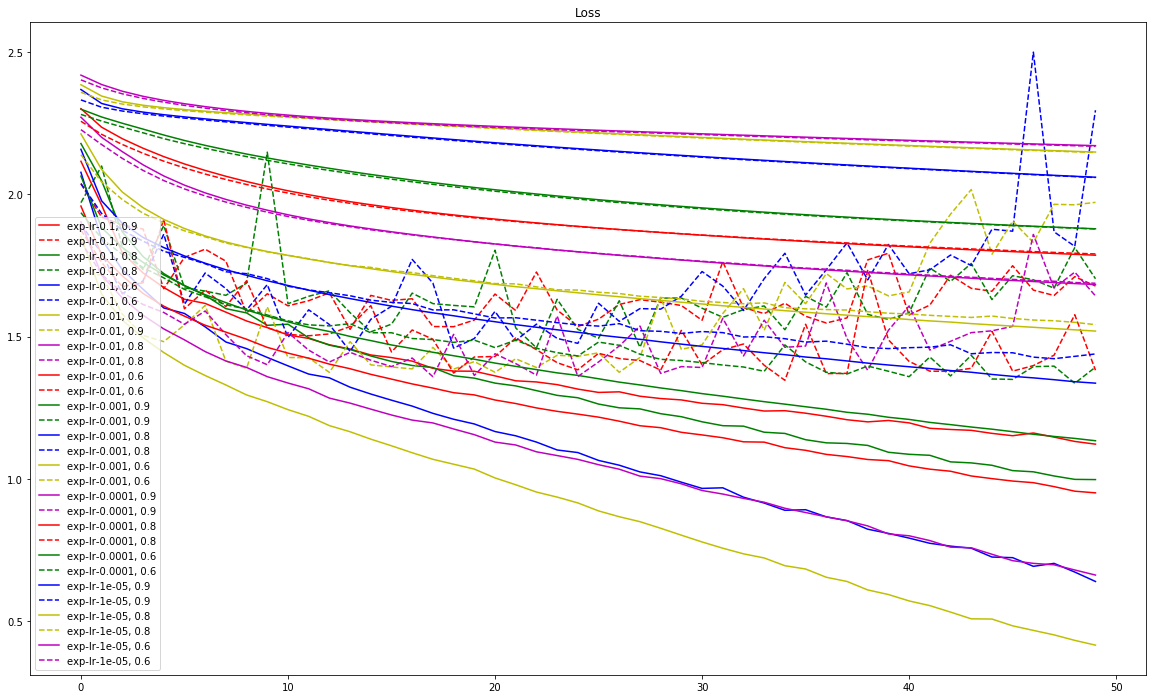

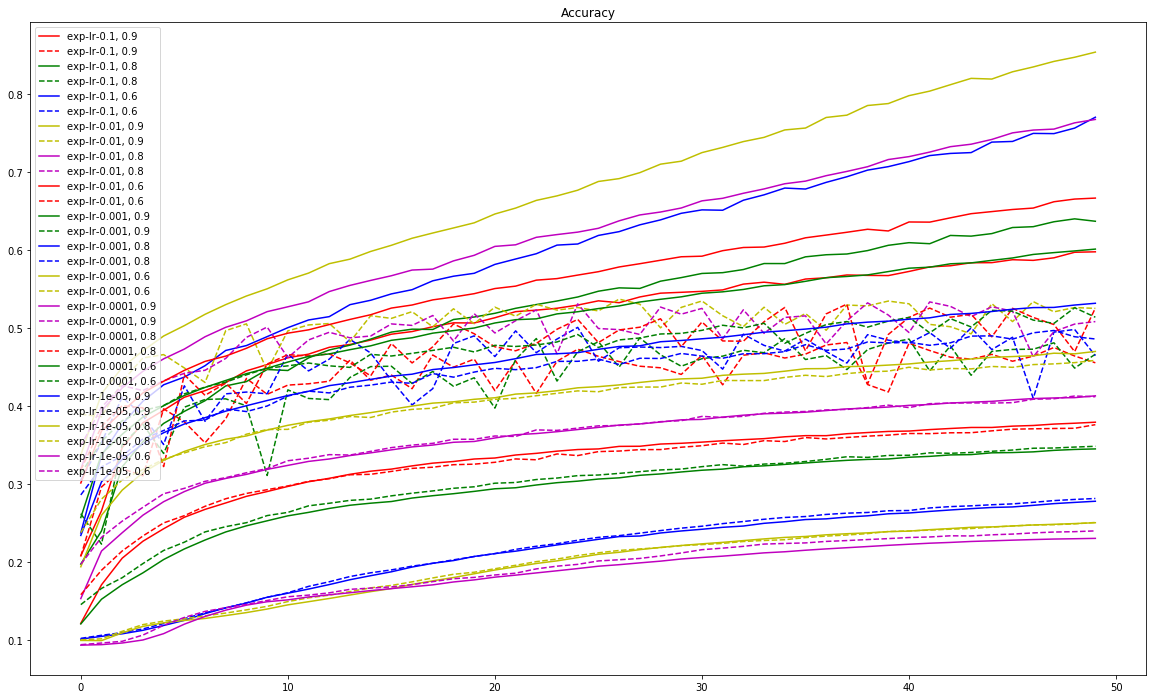

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "r", "g", "b", "y", "m", "r", "g", "b", "y", "m"]

plt.figure(figsize=(20,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [30]:
## 超參數設定
LEARNING_RATE = [1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9, 0.6]

In [31]:
results2 = {}
for lr in LEARNING_RATE:
    for m in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        #model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=m) # without nestrov
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-lr-%s, %s" % (str(lr), str(m))
        results2[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with LR = 0.001000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.1071 - accuracy: 0.2490 - val_loss: 1.9570 - val_accuracy: 0.3104
Epoch 2/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.8900 - accuracy: 0.3325 - val_loss: 1.8364 - val_accuracy: 0.3498
Epoch 3/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.8106 - accuracy: 0.3622 - val_loss: 1.7853 - val_accuracy: 0.3758
Epoch 4/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.7588 - accuracy: 0.3804 - val_loss: 1.7423 - val_accuracy: 0.3832
Epoch 5/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.7150 - accuracy: 0.3987 - val_loss: 1.6973 - val_accuracy: 0.4106
Epoch 6/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.6823 - accuracy: 0.4105 - val_loss: 1.6626 - val_accuracy: 0.4182
Epoch 7/50
50000/50000 [========

Epoch 5/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.9027 - accuracy: 0.3294 - val_loss: 1.8880 - val_accuracy: 0.3322
Epoch 6/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.8719 - accuracy: 0.3409 - val_loss: 1.8636 - val_accuracy: 0.3423
Epoch 7/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.8468 - accuracy: 0.3512 - val_loss: 1.8385 - val_accuracy: 0.3578
Epoch 8/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.8249 - accuracy: 0.3583 - val_loss: 1.8179 - val_accuracy: 0.3665
Epoch 9/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.8061 - accuracy: 0.3673 - val_loss: 1.8011 - val_accuracy: 0.3713
Epoch 10/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.7895 - accuracy: 0.3738 - val_loss: 1.7863 - val_accuracy: 0.3775
Epoch 11/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.7747 - accuracy: 0.3769 - va

50000/50000 [==============================] - 6s 112us/step - loss: 1.9455 - accuracy: 0.3211 - val_loss: 1.9371 - val_accuracy: 0.3242
Epoch 10/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.9284 - accuracy: 0.3262 - val_loss: 1.9208 - val_accuracy: 0.3260
Epoch 11/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.9131 - accuracy: 0.3314 - val_loss: 1.9068 - val_accuracy: 0.3275
Epoch 12/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8998 - accuracy: 0.3350 - val_loss: 1.8950 - val_accuracy: 0.3303
Epoch 13/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.8877 - accuracy: 0.3390 - val_loss: 1.8832 - val_accuracy: 0.3437
Epoch 14/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.8764 - accuracy: 0.3443 - val_loss: 1.8725 - val_accuracy: 0.3461
Epoch 15/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8665 - accuracy: 0.3480 - val_loss:

50000/50000 [==============================] - 6s 113us/step - loss: 2.0861 - accuracy: 0.2697 - val_loss: 2.0824 - val_accuracy: 0.2648
Epoch 14/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.0757 - accuracy: 0.2725 - val_loss: 2.0721 - val_accuracy: 0.2689
Epoch 15/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.0658 - accuracy: 0.2767 - val_loss: 2.0625 - val_accuracy: 0.2726
Epoch 16/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.0565 - accuracy: 0.2801 - val_loss: 2.0534 - val_accuracy: 0.2764
Epoch 17/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.0478 - accuracy: 0.2824 - val_loss: 2.0448 - val_accuracy: 0.2808
Epoch 18/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.0394 - accuracy: 0.2863 - val_loss: 2.0366 - val_accuracy: 0.2831
Epoch 19/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.0315 - accuracy: 0.2897 - val_loss:

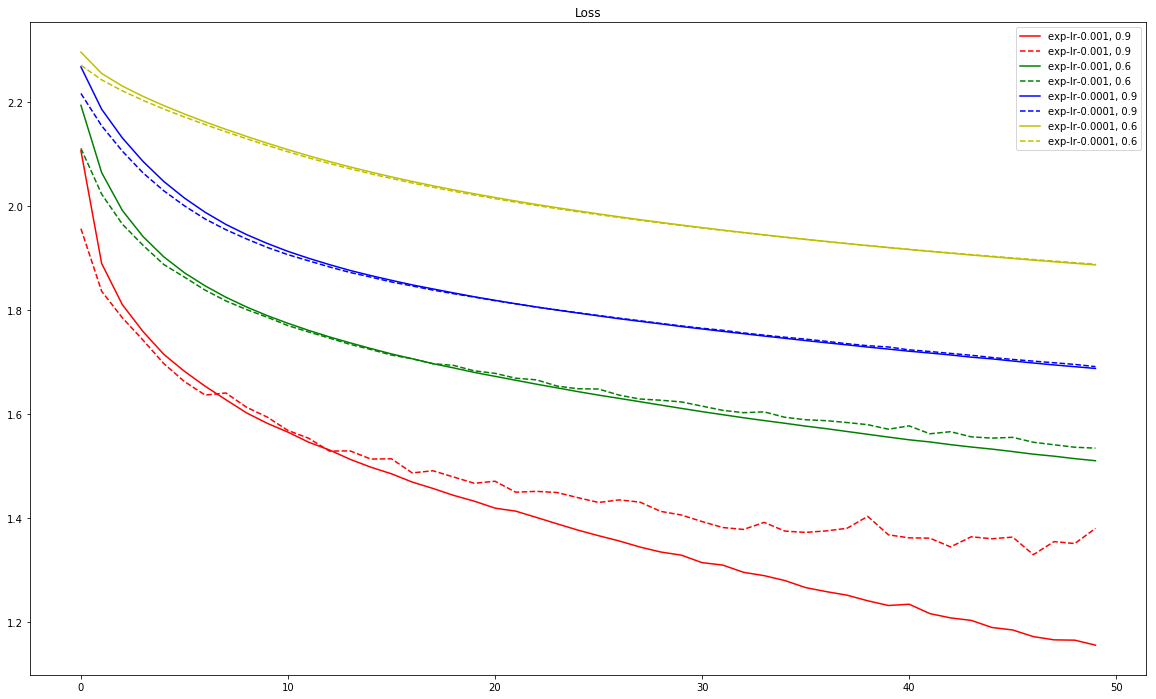

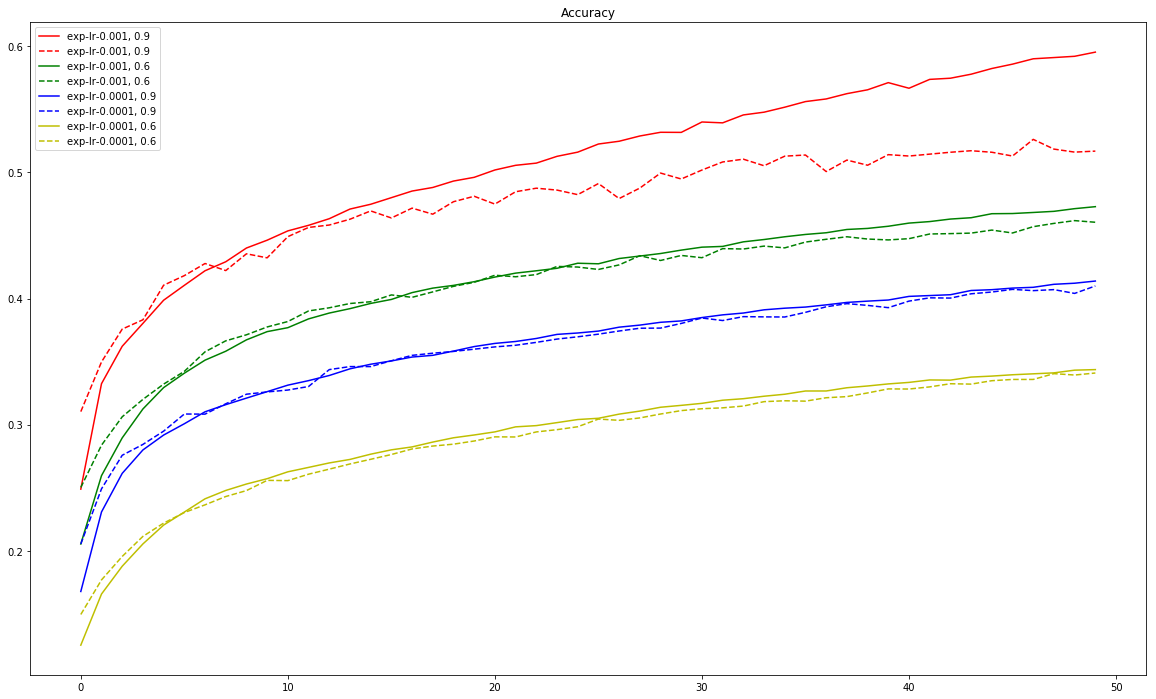

In [34]:
color_bar = ["r", "g", "b", "y"]
plt.figure(figsize=(20,12))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-loss'])),results2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-loss'])),results2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20,12))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-acc'])),results2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-acc'])),results2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()